In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

seq_model = Sequential()
seq_model.add(Dense(32,activation='relu',input_shape = (64,)))
seq_model.add(Dense(32,activation='relu'))
seq_model.add(Dense(10,activation='softmax'))

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [3]:
# 함수형 api

input_tensor = Input(shape=(64,))
x = Dense(32,activation='relu')(input_tensor)
output_tensor = Dense(10,activation='softmax')(x)

model = Model(input_tensor,output_tensor)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 2,410
Trainable params: 2,410
Non-trainable params: 0
_________________________________________________________________


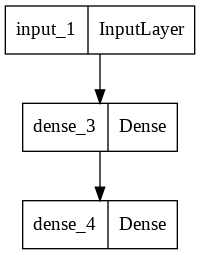

In [4]:
from tensorflow.keras.utils import plot_model
plot_model(model)

- MNIST 이미지 데이터 로드 후 벡터로 재구성
- 데이터에 모델을 맞추고 테스트 데이터에서 모델 평가


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [6]:
inputs = keras.Input(shape=(784,),name = 'digits')
x = Dense(64,activation='relu',name = 'dense_1')(inputs)
x = Dense(64,activation='relu',name = 'dense_2')(x)
outputs = Dense(10,activation='softmax',name='predictions')(x)

model = Model(inputs=inputs, outputs = outputs)

In [7]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000,784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32') 

x_val = x_train[-10000:]
y_val = y_train[-10000:]

x_train = x_train[:-10000]
y_train = y_train[:-10000]

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [9]:
history = model.fit(
    x_train,
    y_train,
    batch_size = 64,
    epochs=2,
    validation_data =(x_val,y_val)
)

Epoch 1/2
782/782 [==============================] - 6s 5ms/step - loss: 0.3431 - sparse_categorical_accuracy: 0.9024 - val_loss: 0.1792 - val_sparse_categorical_accuracy: 0.9501
Epoch 2/2
782/782 [==============================] - 4s 5ms/step - loss: 0.1598 - sparse_categorical_accuracy: 0.9532 - val_loss: 0.1384 - val_sparse_categorical_accuracy: 0.9588


In [10]:
results = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1405 - sparse_categorical_accuracy: 0.9568


CategoricalCrossentropy vs SparseCategoricalCrossentropy
- 훈련 데이터의 label(target)이 one-hot vector 이면 CategoricalCrossentropy
- 훈련 데이터의 label(target)이 정수이면 SparseCategoricalCrossentropy

In [13]:
# 다중 입력 모델
from tensorflow.keras.layers import Embedding, LSTM,concatenate

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape = (None,),
                   dtype = 'int32',
                   name='text')
embedding_text = Embedding(
    text_vocabulary_size,64)(text_input)

encoded_text = LSTM(32)(embedding_text)

question_input = Input(shape = (None,),
                       dtype='int32',
                       name='question')
embedded_question = Embedding(
    question_vocabulary_size,32)(question_input)
encoded_question = LSTM(16)(embedded_question)

concatenated = concatenate([encoded_text,encoded_question], axis = -1)
# axis = -1은 가장 낮은 차원 뒤쪽에서부터 시작. 자료가 2차원이고 axis = -1이면 1차원에 붙이라는 의미

answer = Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input,question_input],answer)
model.compile(optimizer='rmsprop',
              loss = 'categorical_crossentropy',
              metrics=['acc'])

[과제] 입력이 2개인 모델에 대하여 훈련을 수행
- num_samples =1000, max_length=100

다중 모델 출력
- 소셜 미디어에서 익명 사용자의 포스트를 입력으로 받아 그 사람의 나이, 성별, 소득 수준 등을 예측

In [15]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense
vocabulary_size = 50000,
num_income_groups = 10

posts_input = Input(shape=(None,), dtype = 'int32', name='posts')
embedded_posts = Embedding(vocabulary_size, 256)(posts_input)
x = Conv1D(128,5,activation='relu')(embedding_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256,5,activation='relu')(x)
x = Conv1D(256,5,activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Dense(128,activation='relu')(x)

age_prediction = Dense(1,name='age')(x)
income_prediction = Dense(num_income_groups,activation='softmax',name='income')(x)
gender_prediction = Dense(1,activation='sigmoid')(x)

model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

model.compile(optimizer = 'rmsprop',
              loss = ['mse','categorical_crossentropy','binary_crossentropy'])

TypeError: ignored

In [ ]:
model.fit(posts,[age_targets, income_targets, gender_targets], epochs=10,batch_size = 10)